In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [19]:
def load_image(path):
    return cv2.imread(path)

In [20]:
def preprocess_image(image):
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Histogram equalization
    equalized = cv2.equalizeHist(gray)
    
    # Denoising
    denoised = cv2.fastNlMeansDenoising(equalized)
    
    return denoised


In [21]:
images = []
input_dir = "../data/images/"

In [22]:
for i in range(1, 49):
    path = os.path.join(input_dir, f"image{i}.png")
    img = load_image(path)
    if img is not None:
        processed_img = preprocess_image(img)
        images.append(processed_img)
    else:
        print(f"Image {i} n'a pas pu être chargée")

In [23]:
print(f"Nombre d'images chargées avec succès : {len(images)}")

Nombre d'images chargées avec succès : 48


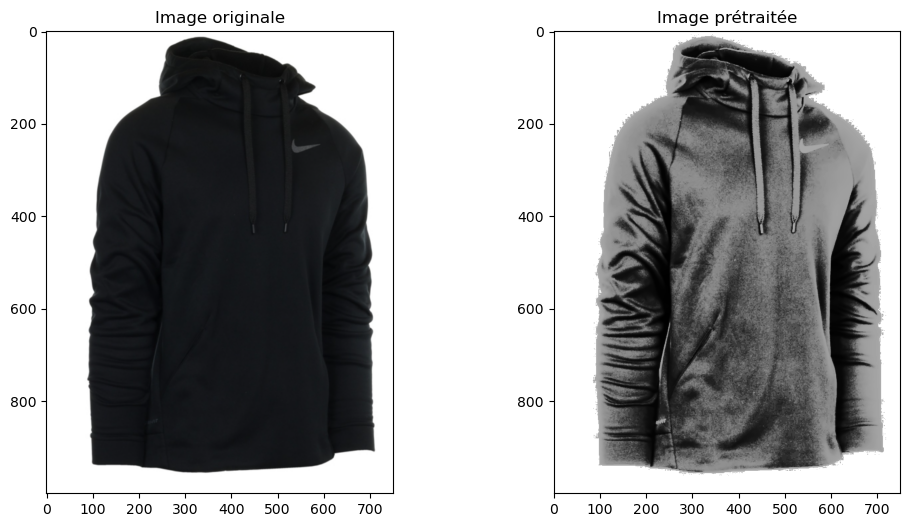

In [24]:
if images:
    original_img = load_image(os.path.join(input_dir, "image1.png"))
    if original_img is not None:
        plt.figure(figsize=(12, 6))
        plt.subplot(121)
        plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
        plt.title("Image originale")
        plt.subplot(122)
        plt.imshow(images[0], cmap='gray')
        plt.title("Image prétraitée")
        plt.show()
    else:
        print("Impossible d'afficher l'image originale")
else:
    print("Aucune image n'a été chargée avec succès")

In [25]:
output_dir = "../data/preprocessed/"
os.makedirs(output_dir, exist_ok=True)
for i, img in enumerate(images):
    output_path = os.path.join(output_dir, f"img{i+1}.jpg")
    cv2.imwrite(output_path, img)

In [26]:
print(f"Prétraitement terminé. Images sauvegardées dans {output_dir}")

Prétraitement terminé. Images sauvegardées dans ../data/preprocessed/
